**Twitter Sentiment Analysis**

Author: Neeha Rawat

In [100]:
#Importing libraries
import re
import tweepy
from tweepy import OAuthHandler
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 

In [101]:
#loading keys
keys=pd.read_csv("keys.csv")

In [102]:
#saving twitter api keys
consumer_key=keys["keys"][0]
consumer_secret=keys["keys"][1]
access_token=keys["keys"][2]
access_token_secret=keys["keys"][3]

In [103]:
authenticate=OAuthHandler(consumer_key, consumer_secret)
authenticate.set_access_token(access_token, access_token_secret)
api=tweepy.API(authenticate, wait_on_rate_limit=True)

In [133]:
#Fetching tweets
posts=api.user_timeline(screen_name="JoeBiden",count=200,language="en",tweet_mode="extended")
print("Five recent tweets \n")
for tweet in posts[0:5]:
  print(tweet.full_text)
  print(tweet.created_at)


Five recent tweets 

RT @POTUS: During National Domestic Violence Awareness and Prevention Month, we come together to reaffirm our commitment to ending domestic…
2021-10-02 17:50:05
RT @POTUS: My Build Back Better Agenda and the Bipartisan Infrastructure Deal will spur economic growth – creating and supporting 4 million…
2021-10-02 14:35:27
RT @POTUS: This week, I’ve been working closely with leaders in Congress to pass my Build Back Better Agenda and Bipartisan Infrastructure…
2021-10-01 23:41:21
RT @POTUS: We are going to deliver for the American people. https://t.co/w5lBtYCUoq
2021-10-01 22:34:05
RT @POTUS: Let me be clear: No hardworking American should be paying more in taxes than entire tech or oil companies. It’s long past time c…
2021-10-01 15:42:12


In [134]:
#saving tweets in a dataframe
d={'Tweets': [tweet.full_text for tweet in posts],'Time-Stamp':[tweet.created_at for tweet in posts],'Retweets':[tweet.retweet_count for tweet in posts]}
df=pd.DataFrame(d)
df.head()

,Tweets,Time-Stamp,Retweets
0,RT @POTUS: During National Domestic Violence A...,2021-10-02 17:50:05,3167
1,RT @POTUS: My Build Back Better Agenda and the...,2021-10-02 14:35:27,3785
2,"RT @POTUS: This week, I’ve been working closel...",2021-10-01 23:41:21,4101
3,RT @POTUS: We are going to deliver for the Ame...,2021-10-01 22:34:05,2362
4,RT @POTUS: Let me be clear: No hardworking Ame...,2021-10-01 15:42:12,4837


In [135]:
df['Date']=[d.date() for d in df['Time-Stamp']]
df['Time']=[d.time() for d in df['Time-Stamp']]

df

,Tweets,Time-Stamp,Retweets,Date,Time
0,RT @POTUS: During National Domestic Violence A...,2021-10-02 17:50:05,3167,2021-10-02,17:50:05
1,RT @POTUS: My Build Back Better Agenda and the...,2021-10-02 14:35:27,3785,2021-10-02,14:35:27
2,"RT @POTUS: This week, I’ve been working closel...",2021-10-01 23:41:21,4101,2021-10-01,23:41:21
3,RT @POTUS: We are going to deliver for the Ame...,2021-10-01 22:34:05,2362,2021-10-01,22:34:05
4,RT @POTUS: Let me be clear: No hardworking Ame...,2021-10-01 15:42:12,4837,2021-10-01,15:42:12
...,...,...,...,...,...
195,RT @POTUS: Great news folks: we hit record-hig...,2021-06-05 18:24:05,11792,2021-06-05,18:24:05
196,"After decades of disinvestment, our roads, bri...",2021-06-05 17:36:46,4515,2021-06-05,17:36:46
197,Now is the time to build on the foundation we'...,2021-06-04 23:25:40,2538,2021-06-04,23:25:40
198,Unemployment is at its lowest level since the ...,2021-06-04 20:31:22,2100,2021-06-04,20:31:22


In [136]:
df=df.drop('Time-Stamp',axis=1)
df

,Tweets,Retweets,Date,Time
0,RT @POTUS: During National Domestic Violence A...,3167,2021-10-02,17:50:05
1,RT @POTUS: My Build Back Better Agenda and the...,3785,2021-10-02,14:35:27
2,"RT @POTUS: This week, I’ve been working closel...",4101,2021-10-01,23:41:21
3,RT @POTUS: We are going to deliver for the Ame...,2362,2021-10-01,22:34:05
4,RT @POTUS: Let me be clear: No hardworking Ame...,4837,2021-10-01,15:42:12
...,...,...,...,...
195,RT @POTUS: Great news folks: we hit record-hig...,11792,2021-06-05,18:24:05
196,"After decades of disinvestment, our roads, bri...",4515,2021-06-05,17:36:46
197,Now is the time to build on the foundation we'...,2538,2021-06-04,23:25:40
198,Unemployment is at its lowest level since the ...,2100,2021-06-04,20:31:22


In [137]:
#creating a function to clean tweets
def clean_tweets(text):
  text=re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z\t])|(\w+:\/\/\s+)|(https)"," ",text)
  return text
df['Tweets']=df['Tweets'].apply(clean_tweets)
df

,Tweets,Retweets,Date,Time
0,RT During National Domestic Violence Awaren...,3167,2021-10-02,17:50:05
1,RT My Build Back Better Agenda and the Bipa...,3785,2021-10-02,14:35:27
2,RT This week I ve been working closely wit...,4101,2021-10-01,23:41:21
3,RT We are going to deliver for the American...,2362,2021-10-01,22:34:05
4,RT Let me be clear No hardworking American...,4837,2021-10-01,15:42:12
...,...,...,...,...
195,RT Great news folks we hit record high hea...,11792,2021-06-05,18:24:05
196,After decades of disinvestment our roads bri...,4515,2021-06-05,17:36:46
197,Now is the time to build on the foundation we ...,2538,2021-06-04,23:25:40
198,Unemployment is at its lowest level since the ...,2100,2021-06-04,20:31:22


In [138]:
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Day']=pd.DatetimeIndex(df['Date']).day
df

,Tweets,Retweets,Date,Time,Month,Day
0,RT During National Domestic Violence Awaren...,3167,2021-10-02,17:50:05,10,2
1,RT My Build Back Better Agenda and the Bipa...,3785,2021-10-02,14:35:27,10,2
2,RT This week I ve been working closely wit...,4101,2021-10-01,23:41:21,10,1
3,RT We are going to deliver for the American...,2362,2021-10-01,22:34:05,10,1
4,RT Let me be clear No hardworking American...,4837,2021-10-01,15:42:12,10,1
...,...,...,...,...,...,...
195,RT Great news folks we hit record high hea...,11792,2021-06-05,18:24:05,6,5
196,After decades of disinvestment our roads bri...,4515,2021-06-05,17:36:46,6,5
197,Now is the time to build on the foundation we ...,2538,2021-06-04,23:25:40,6,4
198,Unemployment is at its lowest level since the ...,2100,2021-06-04,20:31:22,6,4


In [139]:
#creating a function to check subjectivity of tweets
def get_tweet_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

df['Subjectivity']=df['Tweets'].apply(get_tweet_subjectivity)

df

,Tweets,Retweets,Date,Time,Month,Day,Subjectivity
0,RT During National Domestic Violence Awaren...,3167,2021-10-02,17:50:05,10,2,0.100000
1,RT My Build Back Better Agenda and the Bipa...,3785,2021-10-02,14:35:27,10,2,0.237500
2,RT This week I ve been working closely wit...,4101,2021-10-01,23:41:21,10,1,0.250000
3,RT We are going to deliver for the American...,2362,2021-10-01,22:34:05,10,1,0.000000
4,RT Let me be clear No hardworking American...,4837,2021-10-01,15:42:12,10,1,0.359722
...,...,...,...,...,...,...,...
195,RT Great news folks we hit record high hea...,11792,2021-06-05,18:24:05,6,5,0.645000
196,After decades of disinvestment our roads bri...,4515,2021-06-05,17:36:46,6,5,0.300000
197,Now is the time to build on the foundation we ...,2538,2021-06-04,23:25:40,6,4,0.208333
198,Unemployment is at its lowest level since the ...,2100,2021-06-04,20:31:22,6,4,0.000000


In [140]:
#creating a function to check polarity of tweets
def get_tweet_polarity(text):
  return TextBlob(text).sentiment.polarity

df['Polarity']=df['Tweets'].apply(get_tweet_polarity)
df

,Tweets,Retweets,Date,Time,Month,Day,Subjectivity,Polarity
0,RT During National Domestic Violence Awaren...,3167,2021-10-02,17:50:05,10,2,0.100000,0.000000
1,RT My Build Back Better Agenda and the Bipa...,3785,2021-10-02,14:35:27,10,2,0.237500,0.237500
2,RT This week I ve been working closely wit...,4101,2021-10-01,23:41:21,10,1,0.250000,0.250000
3,RT We are going to deliver for the American...,2362,2021-10-01,22:34:05,10,1,0.000000,0.000000
4,RT Let me be clear No hardworking American...,4837,2021-10-01,15:42:12,10,1,0.359722,0.050000
...,...,...,...,...,...,...,...,...
195,RT Great news folks we hit record high hea...,11792,2021-06-05,18:24:05,6,5,0.645000,0.480000
196,After decades of disinvestment our roads bri...,4515,2021-06-05,17:36:46,6,5,0.300000,0.350000
197,Now is the time to build on the foundation we ...,2538,2021-06-04,23:25:40,6,4,0.208333,0.166667
198,Unemployment is at its lowest level since the ...,2100,2021-06-04,20:31:22,6,4,0.000000,0.000000


In [141]:
df_June=df[df.Month==6]
df_July=df[df.Month==7]
df_August=df[df.Month==8]
df_September=df[df.Month==9]
df_October=df[df.Month==10]

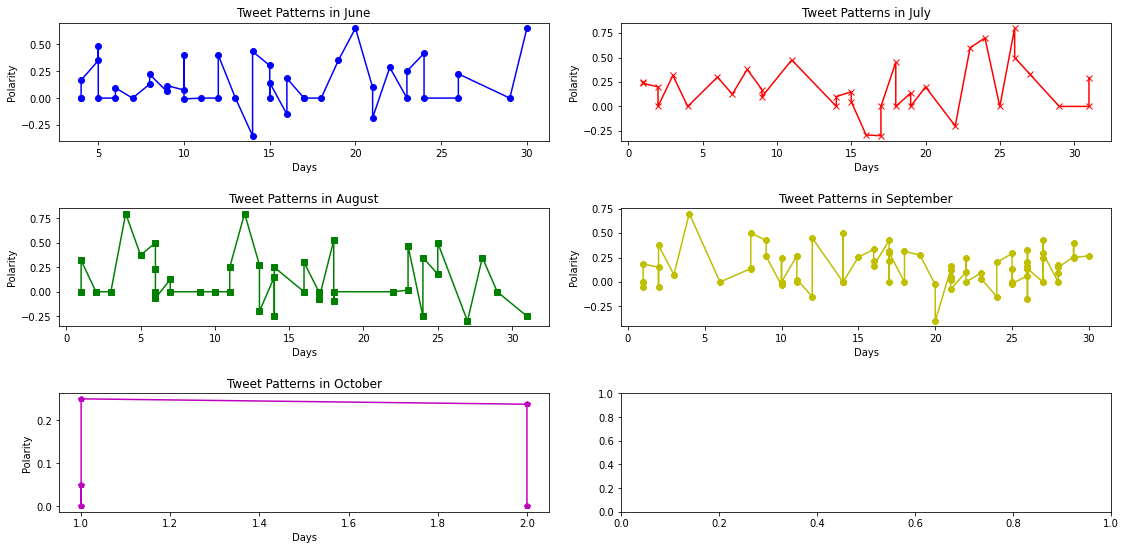

In [142]:
fig, axes = plt.subplots(3, 2, figsize=(16, 8))


axes[0,0].plot(df_June.Day, df_June.Polarity, 'b-o')
axes[0,0].set_xlabel('Days')
axes[0,0].set_ylabel('Polarity')
axes[0,0].set_title('Tweet Patterns in June')


axes[0,1].plot(df_July.Day, df_July.Polarity, 'r-x')
axes[0,1].set_xlabel('Days')
axes[0,1].set_ylabel('Polarity')
axes[0,1].set_title('Tweet Patterns in July')

axes[1,0].plot(df_August.Day, df_August.Polarity, 'g-s')
axes[1,0].set_xlabel('Days')
axes[1,0].set_ylabel('Polarity')
axes[1,0].set_title('Tweet Patterns in August')

axes[1,1].plot(df_September.Day,df_September.Polarity,'y-8')
axes[1,1].set_xlabel('Days')
axes[1,1].set_ylabel('Polarity')
axes[1,1].set_title('Tweet Patterns in September')

axes[2,0].plot(df_October.Day, df_October.Polarity, 'm-p')
axes[2,0].set_xlabel('Days')
axes[2,0].set_ylabel('Polarity')
axes[2,0].set_title('Tweet Patterns in October')

plt.tight_layout(pad=2);

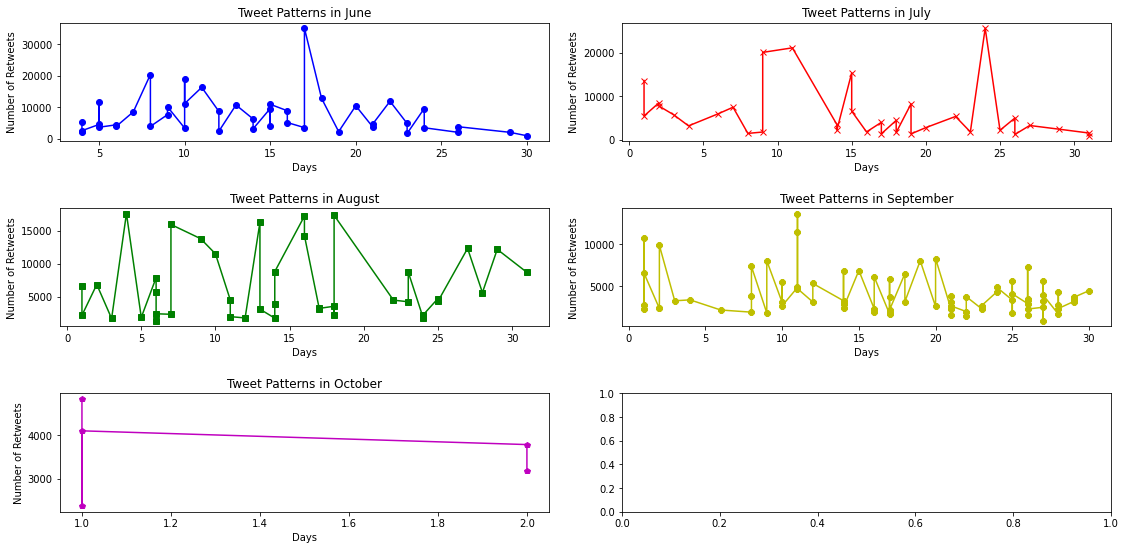

In [143]:
fig, axes = plt.subplots(3, 2, figsize=(16, 8))


axes[0,0].plot(df_June.Day, df_June.Retweets, 'b-o')
axes[0,0].set_xlabel('Days')
axes[0,0].set_ylabel('Number of Retweets')
axes[0,0].set_title('Tweet Patterns in June')


axes[0,1].plot(df_July.Day, df_July.Retweets, 'r-x')
axes[0,1].set_xlabel('Days')
axes[0,1].set_ylabel('Number of Retweets')
axes[0,1].set_title('Tweet Patterns in July')

axes[1,0].plot(df_August.Day, df_August.Retweets, 'g-s')
axes[1,0].set_xlabel('Days')
axes[1,0].set_ylabel('Number of Retweets')
axes[1,0].set_title('Tweet Patterns in August')

axes[1,1].plot(df_September.Day,df_September.Retweets,'y-8')
axes[1,1].set_xlabel('Days')
axes[1,1].set_ylabel('Number of Retweets')
axes[1,1].set_title('Tweet Patterns in September')

axes[2,0].plot(df_October.Day, df_October.Retweets, 'm-p')
axes[2,0].set_xlabel('Days')
axes[2,0].set_ylabel('Number of Retweets')
axes[2,0].set_title('Tweet Patterns in October')

plt.tight_layout(pad=2);

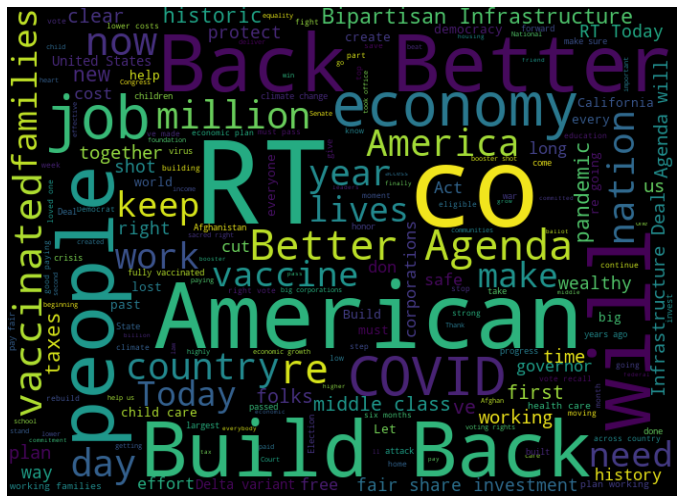

In [144]:
#what word appeared the maximum times
all_words=' '.join([twts for twts in df['Tweets']])
wordCloud= WordCloud(width= 700,height= 500, random_state= 30,max_font_size= 119).generate(all_words)
plt.figure(figsize=(12,9))
plt.imshow(wordCloud, interpolation="bilinear",aspect='auto')
plt.axis('off')
plt.show()

In [145]:
#creating a function to get analysis - positive, negative and neutral moods of the tweets
def get_tweet_analysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis']=df['Polarity'].apply(get_tweet_analysis)
df

,Tweets,Retweets,Date,Time,Month,Day,Subjectivity,Polarity,Analysis
0,RT During National Domestic Violence Awaren...,3167,2021-10-02,17:50:05,10,2,0.100000,0.000000,Neutral
1,RT My Build Back Better Agenda and the Bipa...,3785,2021-10-02,14:35:27,10,2,0.237500,0.237500,Positive
2,RT This week I ve been working closely wit...,4101,2021-10-01,23:41:21,10,1,0.250000,0.250000,Positive
3,RT We are going to deliver for the American...,2362,2021-10-01,22:34:05,10,1,0.000000,0.000000,Neutral
4,RT Let me be clear No hardworking American...,4837,2021-10-01,15:42:12,10,1,0.359722,0.050000,Positive
...,...,...,...,...,...,...,...,...,...
195,RT Great news folks we hit record high hea...,11792,2021-06-05,18:24:05,6,5,0.645000,0.480000,Positive
196,After decades of disinvestment our roads bri...,4515,2021-06-05,17:36:46,6,5,0.300000,0.350000,Positive
197,Now is the time to build on the foundation we ...,2538,2021-06-04,23:25:40,6,4,0.208333,0.166667,Positive
198,Unemployment is at its lowest level since the ...,2100,2021-06-04,20:31:22,6,4,0.000000,0.000000,Neutral


In [146]:
#getting all the positive tweets
ptweets=df[df.Analysis =='Positive']
ptweets=ptweets['Tweets']

ptweets

1      RT    My Build Back Better Agenda and the Bipa...
2      RT    This week  I ve been working closely wit...
4      RT    Let me be clear  No hardworking American...
5      We have a path to usher in a new era of econom...
6      RT    My Build Back Better Agenda and the Bipa...
                             ...                        
190    RT    Folks  the Delta variant   a highly infe...
192    In the competition for the 21st century  the f...
195    RT    Great news folks  we hit record high hea...
196    After decades of disinvestment  our roads  bri...
197    Now is the time to build on the foundation we ...
Name: Tweets, Length: 119, dtype: object

In [147]:
#getting all the negative tweets
ntweets=df[df.Analysis=='Negative']
ntweets=ntweets['Tweets']

ntweets

19     RT    The families of our fallen men and women...
24     We ve made so much progress during the past ei...
29     RT    The majority of Americans who were fully...
35     For the first time in 20 years  the United Sta...
40     RT    We have the tools to put this pandemic b...
41     Our Build Back Better Agenda will invest in wo...
60     RT    We honor all those lost on that dark day...
67     The Department of Labor is developing an emerg...
77     To everyone who is still in harm s way and for...
81     This decision about Afghanistan is not just ab...
83     RT    The past 17 days have seen our troops ex...
86     RT    The American service members who gave th...
90     The United States stands by the commitment we ...
95     Human rights must be the center of our foreign...
97     The answer is clear  We cannot continue to rep...
102    RT    In what is already a challenging time fo...
104    Today  about 40 million families will receive ...
113    On January 6  a mob of e

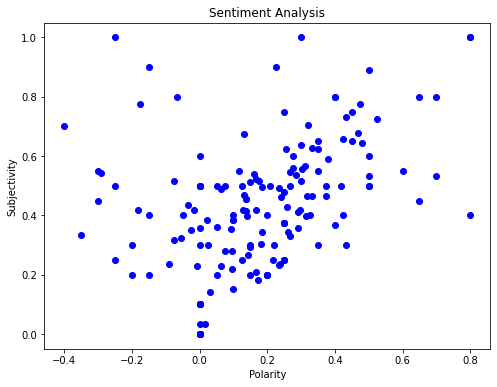

In [148]:
#Visualizing the overall sentiments of the tweets
plt.figure(figsize=(8,6))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color='Blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [149]:
#percentage of positive tweets
print("Percentage of positive tweets: ", ptweets.shape[0]/df.shape[0]*100,"%")

Percentage of positive tweets:  59.5 %


In [150]:
#percentage of negative tweets
print("Percentage of negative tweets: ", ntweets.shape[0]/df.shape[0]*100,"%")

Percentage of negative tweets:  12.5 %


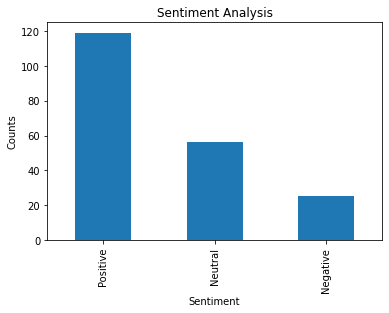

In [151]:
#Categorizing the tweets into positive, negative and neutral
df['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind= 'bar')
plt.show()